# APS1070
#### Linear Regression - Project 4

Please fill out the following:


*   Your **name**: Sai Anirudh Basamsetty
*   Your **student number**:




##**Marking Scheme:**

This project is worth **10 marks** of your final grade plus **One bonus mark**. 

There is no explicit grading for vectorized coding for this project. The vectorized coding will be tested in Q6. The grade of that question will be given based upon the ranking of your training time. **"Vectorized Coding" => "Faster Execution" => Higher Grade! :)**

This notebook is composed of two sections, a Tutorial, and an Exercise. 

The TAs in the lab will help you to complete your tutorial.


##**Important Note:**



1] Start this lab as early as possible, so that you understand concepts in Tutorial well & get enough time to implement Exercise. 
 
2] Provide a graphical representation of data wherever necessary.  

3] This Project contains 6 questions worth a total of 10 points. Because projects will help
you learn things that are complementary to what we covered in class, they should be completed on
your own. Otherwise, you will not learn from taking this course and you are harming yourself.

## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. (Optional) Replicate Linear Regression code on a blank notebook, without viewing this code. [This is called retrieval practice.](https://www.learningscientists.org/blog/2016/6/23-1)
4. Complete exercises.

## Linear Regression - Introduction

### Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

$y = wX + b$

This is the equation for a line that you studied in high school. w is the slope of the line and b is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of Y for any given value of X. Our challenge today is to determine the value of w and b, such that the line corresponding to those values is the best fitting line or gives the minimum error.

Are we always fitting a line into the data? What if we have more than 1 feature (independant variable)?

The vectorized form of above equation is written as $y = Xw$, where y and w are vectors while X is a matrix. 

Where is the b term? It is included within the X matrix.


**Hypothesis of Linear Regression**

The linear regression model can be represented by the following equation:



#$y= w_1x_1 + w_2x_2 + ......+w_nx_n + b(1)$



The bias term can further be incorporated into the quation as an additional weight with cofficient 1

#$y= w_1x_1 + w_2x_2 + ......+w_nx_n + w_0(1)$

- Y is the predicted value ($h_w(x)$)
- w₀ is the bias term.
- w₁,…,wₙ are the model parameters
- x₁, x₂,…,xₙ are the feature values.

### LR - Procedure

Our Loss function for Linear regression would be sum of squares, which makes the cost function to be:


#$L(y,t)=\frac{1}{2}\ (y-t)^2$

Here t is the actual value and y is the predicted value. 
For the simplest case lets assume a straight line with folowing equation Lets substitute the value of y from $y = wx + b$:

#$J=\frac{1}{2N}[\sum_{i=1}^N((wx^{(i)}+b)-t^{(i)})^2]$

Partial Derivative of the above equation with respect to w is shown here:


#$\frac{{\partial J}}{\partial w}=\frac{1}{2N}[\sum_{i=0}^N2((wx^{(i)}+b
)-t^{(i)})(x^{(i)})]$

#$\frac{{\partial J}}{\partial w}=\frac{1}{N}[\sum_{i=0}^Nx^{(i)}(y^{(i)}-t^{(i)})]$

While the Partial Derivative with respect to b is shown here"

#$\frac{\partial J}{\partial b}=\frac{1}{N}[\sum_{i=0}^N(y^{(i)}-t^{(i)})]$

#### Analytical Approach for Linear Regression

Can you derive the Analytical Solution for Linear Regression?

We arrive at the analytical solution when we turn the partial derivatives with respect to the parameters to zero. Why?

This is because at the point where cost function is at the minimum with respect to the parameters (w and b), the derivative of cost function with respect to the parameters would be zero.

The solution for the general case comes out to be:

#$w = (X^TX)^{-1}X^Tt$

With $L_2$ Regularization. Cost:

#$J(w) = \frac{1}{2N}[\sum_{i=1}^N(h_w (x^{(i)}) - t^{(i)})^2 + \lambda\sum_{j=1}^nw^2_j]$ 

#$w = (X^TX + \lambda I)^{-1}X^Tt$

#### Gradient Descent Solution

Gradient descent uses the equations for gradient derived above to find the direction in which we tinker the values of our parameters w and b. 

# $w_j=w_j-\alpha*\frac{{\partial J}}{\partial w}$

# $b_j=b_j-\alpha*\frac{{\partial J}}{\partial b}$

Here the term $\alpha$ is defined as the learning rate.

#### Any other solutions methods?

Some other solution methods are QR Decomposition, Singular-Value Decomposition.

- Do these methods give exact solutions?
- Do these methods scale well with large datasets?

## Let's Start

### Analytical Approach in Code

Let's get our hands dirty.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### We will start with fitting distribution of data points with a line followed by higher order polynomials to visualize the idea behind it.

In [0]:
n = 5 # number of points
w = 2 # slope of line
b = 4 # y intercept of line
r = 2 # range of data on x-axis

np.random.seed(2)
x =  r*np.random.rand(n)
x.sort()
yPerf = w*x + b # perfect world: no noise
y = w*x + b + np.random.randn(n) # imperfect world: we get noisy data

Spoiler Alert: We are in an Imperfect World.

In [0]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

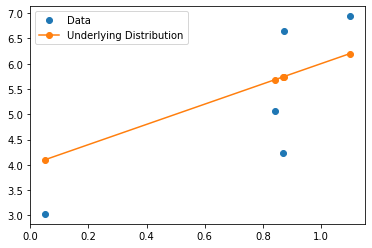

In [0]:
plt.plot(x, y, 'o', label='Data')
plt.plot(x, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
x = np.vstack((np.ones(np.shape(x)), x)).T
y = y.reshape(-1, 1)

In [0]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

# prediction
yPred = np.dot(x, W)

In [0]:
W[0],W[1]

(array([2.67741212]), array([3.35314632]))

- How similar are these to the values we had set initially?
- Will they be same as those set initially if there was no noise?

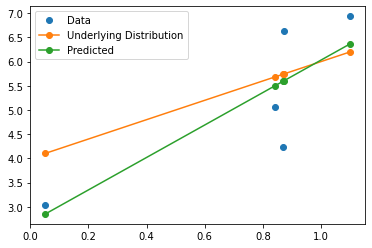

In [0]:
plt.plot(x[:, 1], y, 'o', label='Data')
plt.plot(x[:, 1], yPerf, 'o-', label='Underlying Distribution')
plt.plot(x[:, 1], yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  0.8321853483360432


### Complex Dependant Variable

It's complicated.

In [0]:
n = 20 # number of points
w = 3  # slope of line
b = 10 # y intercept of line
r = 2  # range of data on x-axis

np.random.seed(10)
X = xD = r * np.random.randn(n) # points also stored in xD (xData). will be useful later.
X.sort()
yPerf = X - 2 * (X ** 2) + 0.5 * (X ** 3)
np.random.seed(10)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(0, 5, n) # imperfect world: we get noisy data

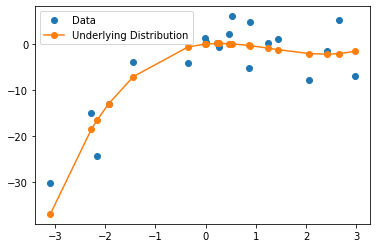

In [0]:
plt.plot(X, y, 'o', label='Data')
plt.plot(X, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
X = np.vstack((np.ones(np.shape(X)), X)).T
y = y.reshape(-1, 1)

In [0]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPredLinear = yPred = np.dot(X, W)

W

array([[-5.45917353],
       [ 3.82202654]])

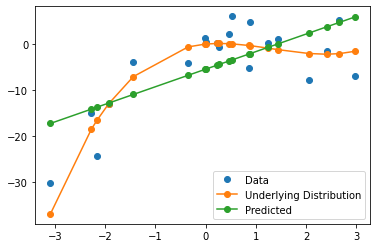

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  6.839531223681816


#### What to do next?

Can we add more features.

In [0]:
X = np.vstack((X.T, xD**2, xD**3)).T


In [0]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred4Feature = yPred = np.dot(X, W)
W

array([[ 0.04177438],
       [ 2.58652514],
       [-1.87142105],
       [ 0.19655185]])

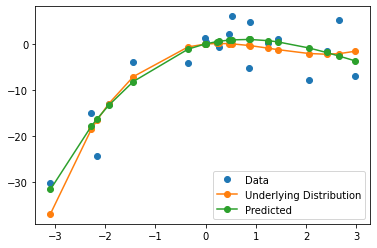

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.929493007090521


But how do we know when to stop, since we would not be knowing when to stop adding features in x.

In [0]:
X = np.vstack((X.T, xD**4, xD**5, xD**6, xD**7)).T

In [0]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred8Feature = yPred = np.dot(X, W)


In [0]:
W

array([[-2.64611130e-01],
       [ 8.28612458e+00],
       [-2.07703327e+00],
       [-6.35661778e+00],
       [-1.30720676e-02],
       [ 1.64293567e+00],
       [-2.08380043e-03],
       [-1.09229711e-01]])

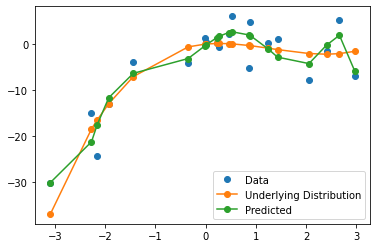

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.3097843019929725


Even though RMSE here (with much more higher features) is lower than previous case, we can see this Predicted Line is quite far from the Underlying distribution. This is called **Overfitting**.

When does the model overfits: when we have more features or comparitively less data for the model.

What exactly is overfitting:
It pays more attention to the noise of the data provided, in a sense trying to rotely memorize everything, 
without generalizing. 

Since we don't know when to stop adding features, what can be done:
- Solution is to work with a model or feature set that can slightly overfit your data, and then use techniques to prevent overfitting from happening.
The alternative gives us underfitting which we cannot fix unless you modify the feature set or model.

Options we have to prevent overfitting. Well there are many, most widely used ones are
- Using a validation set
- Regularization: add penalty on weights

In [0]:
λ = 10 # what is lambda: regularization parameter
f = 8 # number of features

In [0]:
# analytical solution
Warning = np.dot(np.linalg.inv(np.dot(X.T, X) + (λ)*np.identity(f)), np.dot(X.T, y))

# prediction
yPred8FeatRegu = yPred = np.dot(X, W)
W


array([[-2.64611130e-01],
       [ 8.28612458e+00],
       [-2.07703327e+00],
       [-6.35661778e+00],
       [-1.30720676e-02],
       [ 1.64293567e+00],
       [-2.08380043e-03],
       [-1.09229711e-01]])

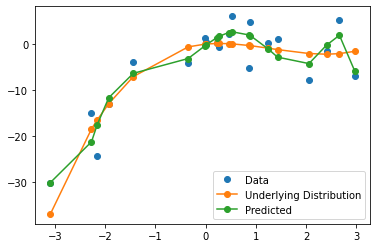

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

Can we know from the plot if the value of λ is optimal:

Somewhat but not exactly. 

To get the exact value of lambda you need to split dataset between training and testing. Then cycle over multiple values of lambda. The most optimum is the one which gives the lowest test error. 

What does low test error represent?

All models together:

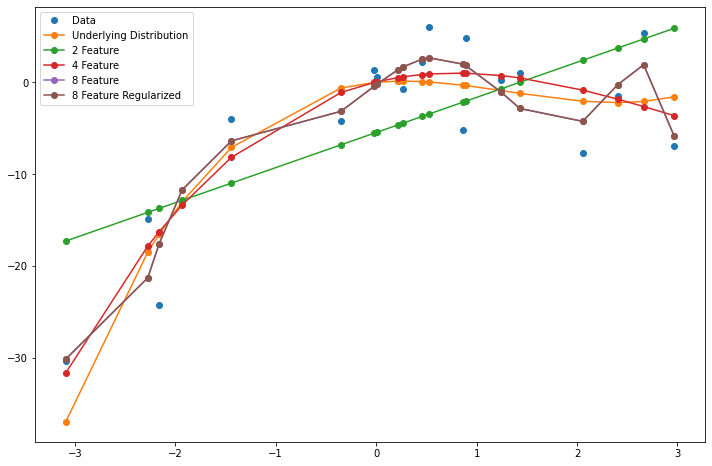

In [0]:
plt.figure(figsize=(12, 8))
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPredLinear, 'o-', label='2 Feature')
plt.plot(xD, yPred4Feature, 'o-', label='4 Feature')
plt.plot(xD, yPred8Feature, 'o-', label='8 Feature')
plt.plot(xD, yPred8FeatRegu, 'o-', label='8 Feature Regularized')

plt.legend()
plt.show()

### Further Complex Multivariate Data

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. Three additional feature were added to this dataset using feature engineering.The objective is to predict the value of prices of the house using the given features. You can download the data by running the cell below.


In [0]:
df=pd.read_csv("https://raw.githubusercontent.com/Saket-Uoft/Data/master/data.csv")

In [0]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,New,New1,New2,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,20.31,0.0,13231.610,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,7.07,0.0,12038.120,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,7.07,0.0,7797.856,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,2.18,0.0,2790.959,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,2.18,0.0,4615.700,36.2


In [0]:
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,New,New1,New2,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,20.31,0.0,13231.610,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,7.07,0.0,12038.120,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,7.07,0.0,7797.856,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,2.18,0.0,2790.959,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,2.18,0.0,4615.700,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,11.93,0.0,10642.180,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,11.93,0.0,12613.280,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,11.93,0.0,16513.740,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,11.93,0.0,16122.930,22.0


We can see that the target value is given by name by the name MEDV 

 Are there any null values in the dataset? 
 ## **No, there are no null values present in the dataset.**

In [0]:
df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
New           0
New1          0
New2          0
MEDV          0
dtype: int64

Even though there are none, it's a good practice to check.

#### Exploratory Data Analysis

We here use distplot method from the seaborn library, which is another popular graphing library for Python.

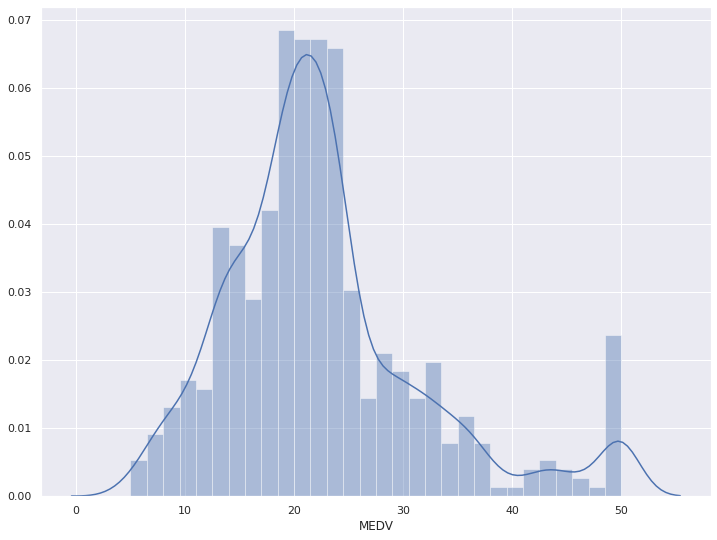

In [0]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

We can see that it mostly normally distributed with a few outliers.

## Linear Regression - Exercise

We'll work with the above dataset for the assignment below.

## Question 1 - Data Prepration [1 mark]

1. Normalize the data using StandardScaler from sklearn.
2. Split the multivariate data into training/validation data- 20% validation data, 80% training data (Note: While splitting use the value of random state=6)
3. Standardize the data.

In [0]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

# Defining X and Y
X = np.array(df.iloc[:,:-1])
Y = np.array(df.iloc[:,-1]).reshape(-1,1)

# Splitting data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 6)

In [0]:
# Initializing Standard Scaler class and fitting it to X_train data
s = StandardScaler()
s.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# Transforming both X_train and X_val with means and stds of X_train
X_train = s.transform(X_train)
X_val = s.transform(X_val)

# Stacking bias column to X_train
X_train = np.hstack((np.ones((X_train.shape[0],1)),X_train))
X_val = np.hstack((np.ones((X_val.shape[0],1)),X_val))

## Question 2 - Direct Solution [1 marks]

Impelement the direct solution for linear regression on the dataset above and find best lambda.

1. Plot Train error and Validation error as a function of the lambda regularizer.
2. What is the best lambda where the best fit occurs? Use this best lambda from here on out.
#Solution:
Mean square error was used to calculate the error for the above problem.
##**The best lambda value with least test error is 9**
This can be verified from the matrix solution plotted below for training error

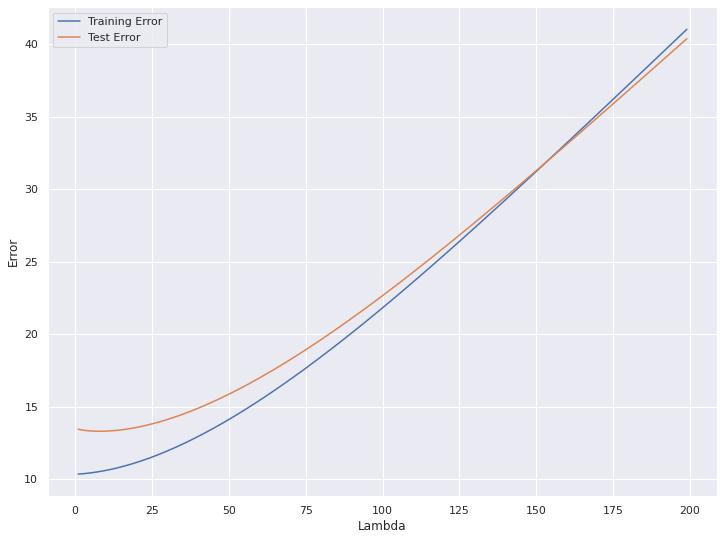

In [0]:
LAMBDAS = list(range(1,200))
features = X_train.shape[1]
train_errors = []
val_errors = []

for lambda_ in LAMBDAS:
    # Calculating w using closed form solution
    w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (lambda_)*np.identity(features)), np.dot(X_train.T, Y_train))

    # Calculating train and val errors (MSE with with half factors NO REG TERM) 
    train_error = 0.5*np.sum((np.dot(X_train,w) - Y_train)**2)/X_train.shape[0]
    val_error = 0.5*np.sum((np.dot(X_val,w) - Y_val)**2)/X_val.shape[0]

    # Appending errors to empty lists
    train_errors.append(train_error)
    val_errors.append(val_error)
    # Plotting results
plt.plot(LAMBDAS, train_errors, label="Training Error") 
plt.plot(LAMBDAS, val_errors, label = "Test Error")
plt.legend()
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.show()

## This direction solution Test error: 13.29499466375637

In [0]:
#Computing the test error for direct solution o compare in the final question
w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + 9*np.identity(features)), np.dot(X_train.T, Y_train))
val_error_original =(0.5*np.sum((np.dot(X_val,w) - Y_val)**2)/X_val.shape[0])
print(val_error_original)

13.29499466375637


In [0]:
#Since argmin returns the index of the lambda value with least error, 1 is added
print("Lambda for Lowest Train Error:",LAMBDAS[np.argmin(train_errors)+1])
print("Lambda for Lowest Test Error:",LAMBDAS[np.argmin(val_errors)+1])

Lambda for Lowest Train Error: 2
Lambda for Lowest Test Error: 9


## Question 3 - Gradient Descent [2 marks]

1. Implement gradient descent (full-batch) for linear regression using a fixed learning rate $\alpha$ of 1e-2. You should compute the gradients yourself!

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the direct solution with the same lambda.

#The below code runs for 1000 iterations and LAMBDA value is taken as 9.

#Conclusion:
Most of the weights from GradientDescent lie within 30% of the weights of the analytical (closed form) solution as seen in the table. Only few of the weights are different by more than 30%.

In [0]:
# Function to run one Gradient Descent Step
def gradDescent(X, y_pred, y_actual, w, λ, lr = 0.01):
    # Compute residuals
    residuals = y_pred - y_actual

    # Compute gradient
    grad = np.dot(X.T, residuals) + λ*w

    # Gradient update
    w = w - (lr/X.shape[0])*grad
    
    return w

# This function computes cost
def compute_cost(y_pred, y_actual, w, λ):
    # Compute residuals
    residuals = y_pred - y_actual

    # residuals cost
    res_cost = np.sum(residuals**2)

    # regularization cost
    reg_cost = λ*np.sum(w**2)

    return (res_cost + reg_cost)/(2*y_pred.shape[0])

# This function returns training error (MSE with half factor NO REG TERM)
def trainingError(y_pred, y_actual):
    residuals = y_pred - y_actual
    return np.sum((residuals)**2)/(y_pred.shape[0]*2)

def fullBatchGD(X, y, w, λ = 9, lr = 0.01, iterations = 1000):
   
    m, n = X.shape
    
    # Initializing storage variables
    costHistory = np.zeros(iterations)
    trainingErrorHistory = np.zeros(iterations)
    
    for _ in range(iterations):
        # Compute predictions
        y_pred = np.dot(X,w)
        
        # Compute cost
        cost = compute_cost(y_pred, y, w, λ)
        costHistory[_] = cost
        
        # Compute training error
        t_error = trainingError(y_pred, y)
        trainingErrorHistory[_] = t_error
        
        # Gradient Descent
        w = gradDescent(X = X, y_pred = y_pred, y_actual = y, w = w, λ = λ, lr = lr)
    
    return w, costHistory, trainingErrorHistory

In [0]:
np.random.seed(42)
w_gd, costHistory, _ = fullBatchGD(X_train, Y_train, w = np.random.randn(18,1))

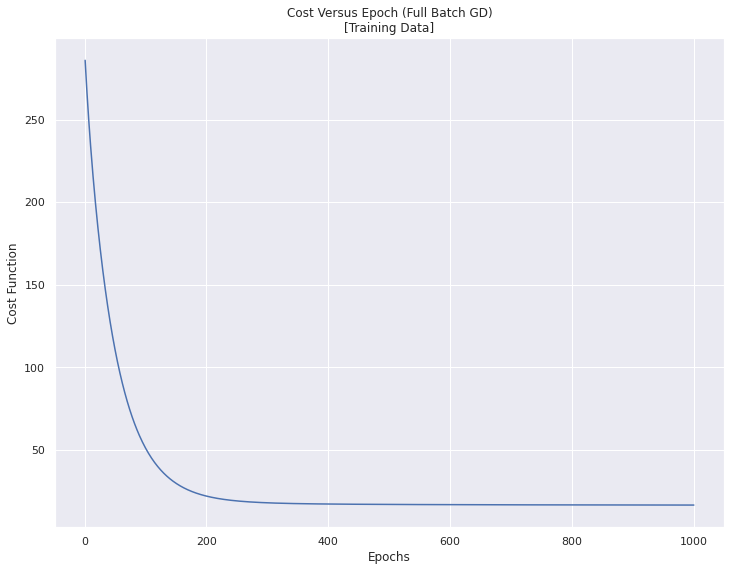

In [0]:
plt.plot(list(range(1,1001)), costHistory)
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.title("Cost Versus Epoch (Full Batch GD)\n[Training Data]")
plt.show()

In [0]:
# Matrix Solution
LAMBDA = 9
w_closed_form = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (LAMBDA)*np.identity(features)), np.dot(X_train.T, Y_train))
display(pd.DataFrame(np.hstack((w_gd, w_closed_form, np.abs((w_gd - w_closed_form)/w_closed_form)*100)), columns = ["Gradient Descent Weights", "Closed Form Solution Weights", "% Difference of GD from Closed Form"]))

,Gradient Descent Weights,Closed Form Solution Weights,% Difference of GD from Closed Form
0,22.258088,22.258838,0.003370
1,-0.145412,-0.194481,25.230926
2,-0.420453,-0.617596,31.921106
3,1.342630,0.559471,139.982137
4,-0.470575,-0.523648,10.135153
5,0.647295,0.424816,52.370561
6,-0.990898,-1.520826,34.844796
7,2.655814,2.466663,7.668284
8,-0.114693,-0.132534,13.461912
9,-2.603751,-2.999029,13.180191


## Question 4 - Mini-batch size and learning rate [2 marks]

1- Impelement Mini-batch Gradient Descent.

2- Sweep different values for the batch size with a fixed learning rate and report your findings on a plot (Training Error, Test Error,...).

3- Select the best batch sized based on fastest convergence (number of times you update the weights) and sweep the learning rate. Report your findings on a plot.


This answer is based on 20 iterations and Lambda=9. Initially learning rate was taken as 0.01.

Fastest convergence in terms of number of grad updates: 

*   Initially tried with batch sizes 1,16,64,128,256,404, where it was observed that batch size=1 converges faster but has lot of distortions.
*   Batch size =16 converges faster but does not give minimum percentage error.

So finally tried with batch size 64,128,256,404
#For Training Set:
**Conclusion based on GRADIENT UPDATES:** From the plots it can be observed that the batch number with least size converges faster with least number of gradient updates i.e **Batch 64**.

**Conclusion Based on WALLCLOCK time**: From the plots it can be observed that batch size 64 converges faster

Note: Even though batch 1 and 16 converges way too faster they were neglected dut to distortions and they also do not converge to minimum value.

#For Train set:



In [0]:
import time
def batchGradientDescent(X, y, w, lr=0.01, iterations=20, λ=9, bs=1):
    # This implementation assumes that X already has a bias column
    # m is the nunmber of data points, n is the number of features
    m, n = X.shape

    # these are used to stored the time
    timeHistory = np.zeros(iterations)
    wallclock = np.zeros(iterations)
    gradupdates = []
    
    for i in range(iterations):
        # Store the current time
        start_time = time.time()
        
        # Randomize X and Y
        indexes = np.random.permutation(m)
        X_r = X[indexes,:]
        y_r = y[indexes]
        
        # Loop through the shuffled dataset in mini batches
        for j in range(0, m, bs):
            # This code checks whether the next batch is the last batch of the 
            # r dataset
            if j+bs >= m:
                m_x = X_r[j:]
                m_y = y_r[j:]
            else:
                m_x = X_r[j:j+bs]
                m_y = y_r[j:j+bs]
            
            # Prediction of mini batch
            y_pred = np.dot(m_x,w)

            # Calculating residual
            residuals = y_pred - m_y

            # Calculating L2 regularized gradient
            grad = np.dot(m_x.T, residuals) + λ*w

            # Updating weights based on learning rate and batch size
            w -= (lr/bs)*grad

            # Calculating training error as MSE with 0.5 factor (NO REG. TERM)
            te_after_update = 0.5*np.sum((np.dot(X_r, w) - y_r)**2)/m
            gradupdates.append(te_after_update)

        # Calculating time taken for iteration in microseconds   
        time_taken = time.time() - start_time
        
        # Calculating training error as MSE with 0.5 factor (NO REG. TERM)
        te_wallclock = 0.5*np.sum((np.dot(X_r, w) - y_r)**2)/m

        timeHistory[i] = time_taken
        wallclock[i] = te_wallclock
        
    return w, timeHistory, gradupdates, wallclock

The following code snippet runs batch gradient descent for different batch sizes

In [0]:
# Batch sizes to test
BATCH_SIZES = [1,16,64, 128, 256, 404]
# Initializing storage variables
TIME_HISTORIES = []
GRAD_UPDATES = []
WALL_CLOCK = []

for bs in BATCH_SIZES:
    # Initializing random w
    np.random.seed(42)
    W = np.random.randn(18,1)
    
    w, timeHistory, gradupdates, wallclock = batchGradientDescent(X_train, Y_train, w = W, lr=0.01, iterations=20, bs=bs)
    GRAD_UPDATES.append(gradupdates)
    WALL_CLOCK.append(wallclock)
    TIME_HISTORIES.append(timeHistory)
    

The following code snippet plots training error vs Number of updates for different batch sizes

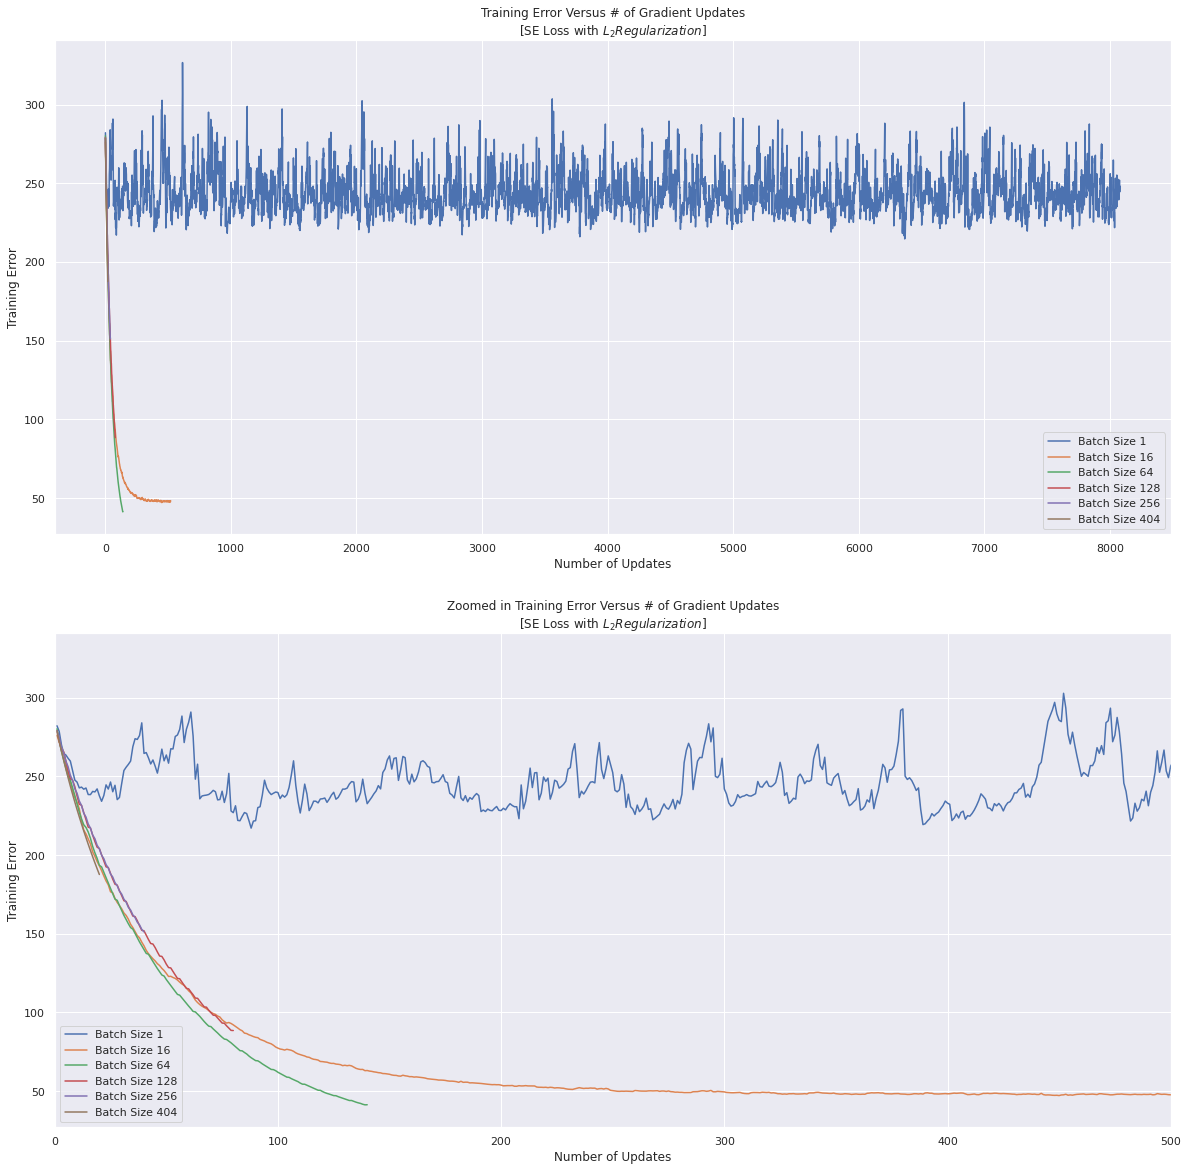

In [0]:
# Plotting training error versus gradient updates
fig, ax_lst = plt.subplots(2, 1, sharey=True, figsize=(20,20))

for count, update in enumerate(GRAD_UPDATES):
    ax_lst[0].plot(list(range(1, len(update)+1)), update, label = f"Batch Size {BATCH_SIZES[count]}")
    ax_lst[1].plot(list(range(1, len(update)+1)), update, label = f"Batch Size {BATCH_SIZES[count]}")

for ax in ax_lst:
  ax.set_xlabel("Number of Updates")
  ax.set_ylabel("Training Error")
  ax.legend()

ax_lst[0].title.set_text("Training Error Versus # of Gradient Updates\n[SE Loss with $L_{2} Regularization$]")
ax_lst[1].title.set_text("Zoomed in Training Error Versus # of Gradient Updates\n[SE Loss with $L_{2} Regularization$]")
ax_lst[1].set_xlim([-0.01,500])
plt.show()

The following code snippet plots training error Time for different batch sizes

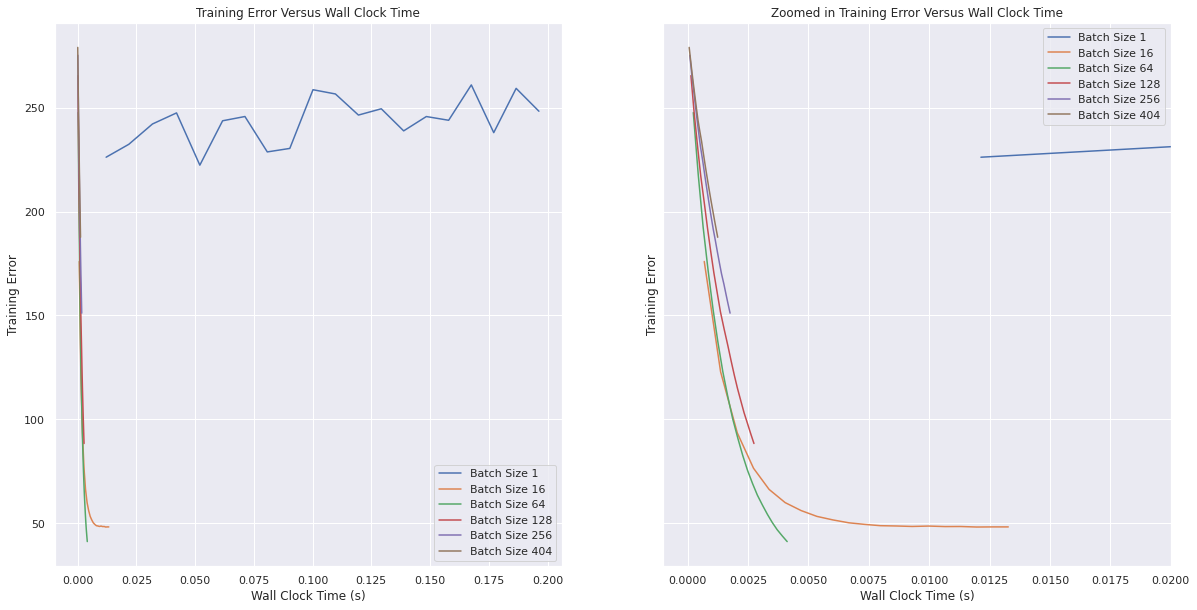

In [0]:
# Plotting training error versus time taken
fig, ax_lst = plt.subplots(1, 2, sharey=True, figsize=(20,10))

for count, wall_c in enumerate(WALL_CLOCK):
    t_hist = TIME_HISTORIES[count].cumsum()
    ax_lst[0].plot(t_hist, wall_c, label = f"Batch Size {BATCH_SIZES[count]}")
    ax_lst[1].plot(t_hist, wall_c, label = f"Batch Size {BATCH_SIZES[count]}")

for ax in ax_lst:
  ax.set_xlabel("Wall Clock Time (s)")
  ax.set_ylabel("Training Error")
  ax.legend()

ax_lst[0].title.set_text("Training Error Versus Wall Clock Time")
ax_lst[1].title.set_text("Zoomed in Training Error Versus Wall Clock Time")
ax_lst[1].set_xlim([-0.001,0.02])

plt.show()

The following code snippet plots training error vs Number of iterations for different batch sizes

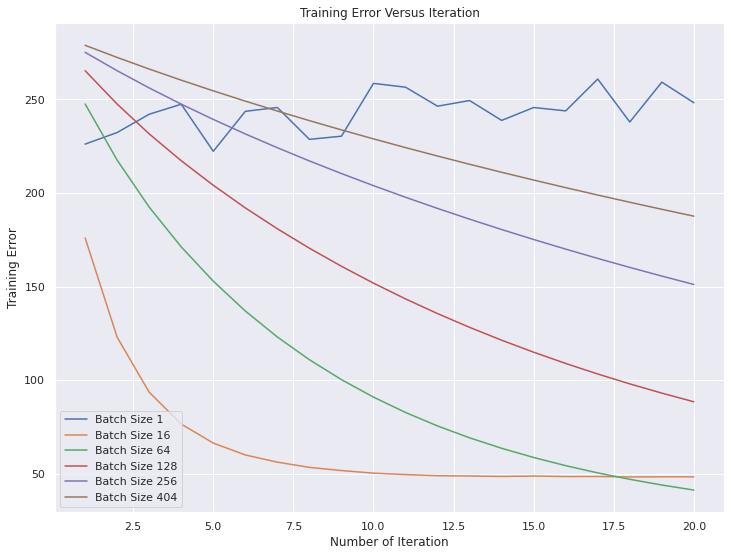

In [0]:
# Plotting training error versus iteration
for count, wall_c in enumerate(WALL_CLOCK):
    plt.plot(list(range(1,21)), wall_c, label = f"Batch Size {BATCH_SIZES[count]}")
plt.legend()
plt.xlabel("Number of Iteration")
plt.ylabel("Training Error")
plt.title("Training Error Versus Iteration")
plt.show()

The following code snippet plots training error vs number of iterations for different learning rates for a constant batch size

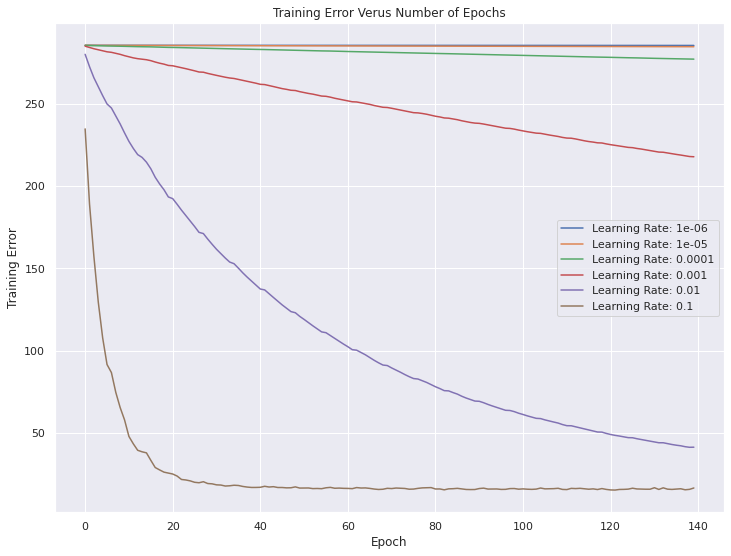

In [0]:
def batchGradientDescent_lr(X, y,w, lr=0.01, iterations=20, λ=9, bs=64):
    # This implementation assumes that X already has a bias column
    # m is the number of data points, n is the number of features
    m, n = X.shape

    # these are used to stored the time
    
    
    gradupdates = []
    
    for i in range(iterations):
        
        
        # Randomize X and Y
        indexes = np.random.permutation(m)
        X_r = X[indexes,:]
        y_r = y[indexes]
       
        
        # Loop through the shuffled dataset in mini batches
        for j in range(0, m, bs):
            # This code checks whether the next batch is the last batch of the 
            # r dataset
            if j+bs >= m:
                m_x = X_r[j:]
                m_y = y_r[j:]
            else:
                m_x = X_r[j:j+bs]
                m_y = y_r[j:j+bs]
            
            # Prediction of mini batch
            y_pred = np.dot(m_x,w)

            # Calculating residual
            residuals = y_pred - m_y

            # Calculating L2 regularized gradient
            grad = np.dot(m_x.T, residuals) + λ*w

            # Updating weights based on learning rate and batch size
            w -= (lr/bs)*grad

            # Calculating training error as MSE with 0.5 factor (NO REG. TERM)
            te_after_update_lr = 0.5*np.sum((np.dot(X_r, w) - y_r)**2)/m
            gradupdates.append(te_after_update_lr)

        

        
    return gradupdates
# Learning Rates
LEARNING_RATES = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]



GRAD_UPDATES = []


for lr in LEARNING_RATES:
    # Initializing random w
    np.random.seed(42)
    W = np.random.randn(18,1)
    
    gradupdates = batchGradientDescent_lr(X_train, Y_train, w = W, lr=lr, bs=64)
    GRAD_UPDATES.append(gradupdates)
    

# Plotting results
for count, err in enumerate(GRAD_UPDATES):
    plt.plot(list(range(0,140)), err, label = f"Learning Rate: {LEARNING_RATES[count]}")
    plt.xlabel("Epoch")
    plt.ylabel("Training Error")
plt.legend()
plt.title("Training Error Verus Number of Epochs")
plt.show()
    
  

#COMPARING LEARNING RATES AND BATCH SIZES FOR ERROR versus VARIOUS PARAMETERS LIKE WALLCLOCK, NUMBER OF ITERATIONS, NO OF UPDATES

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in square


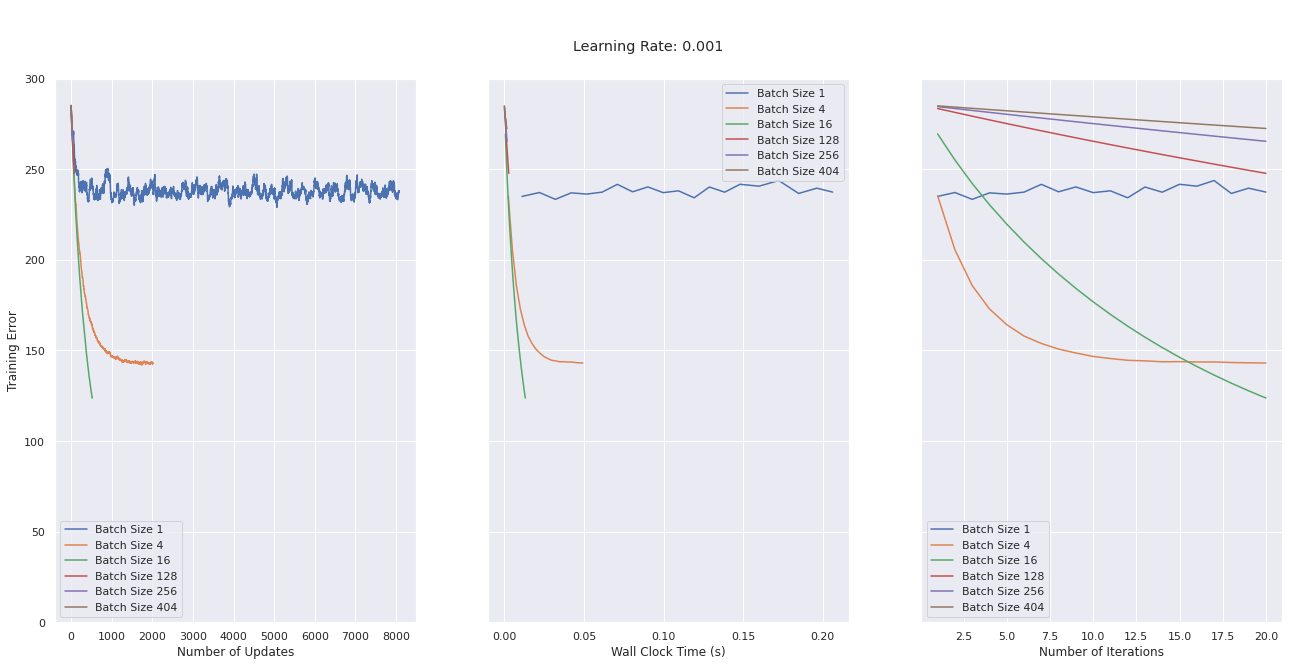

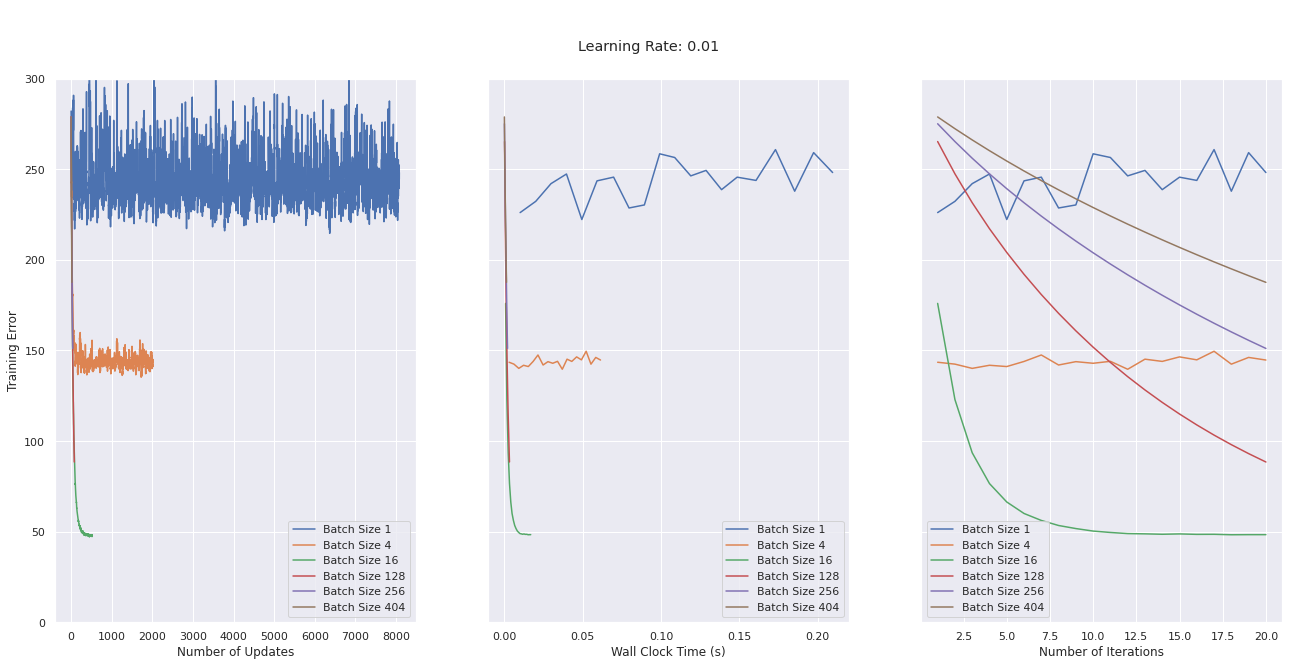

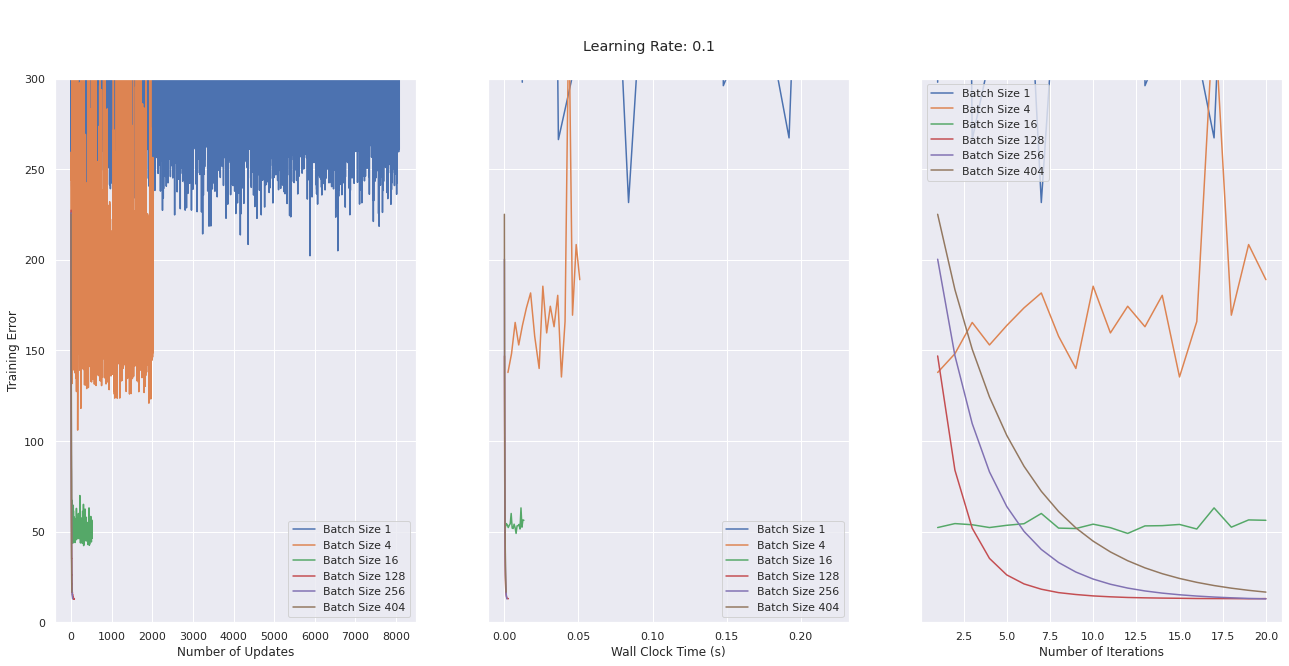

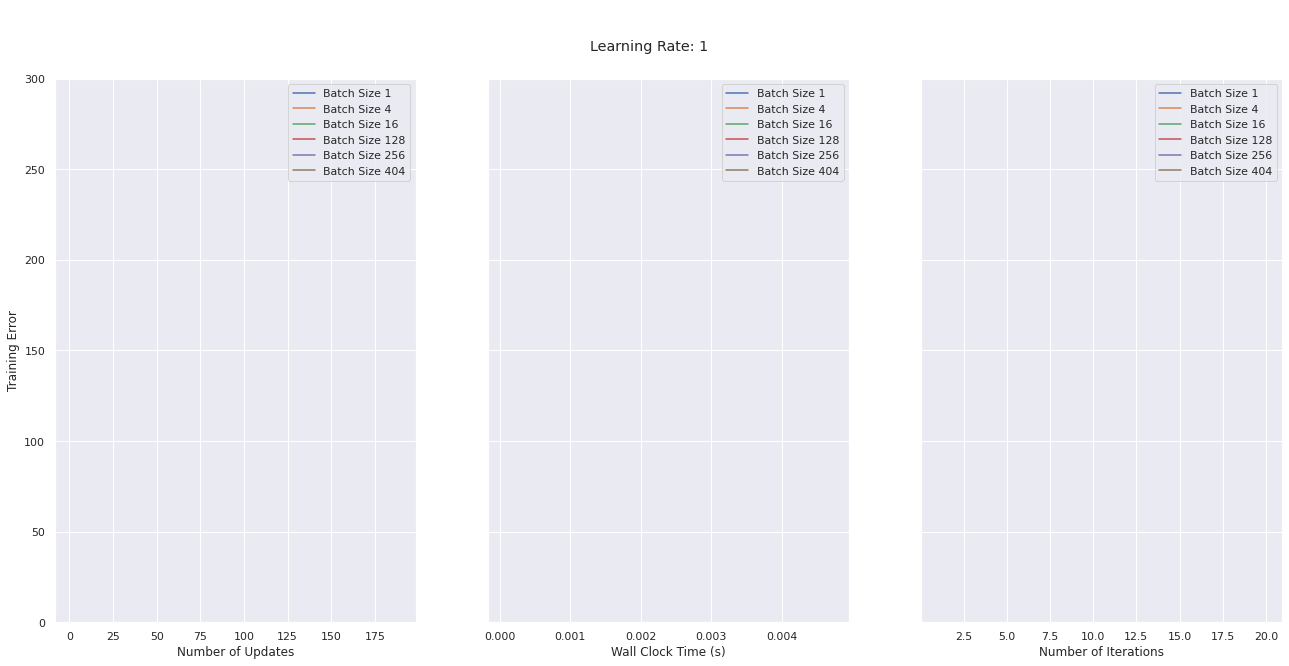

In [0]:
LEARNING_RATES = [0.001, 0.01, 0.1, 1]
BATCH_SIZES = [1, 4, 16, 128, 256, 404]

FINAL_TIME_HISTORIES_SE = []
FINAL_GRAD_UPDATES_SE = []
FINAL_WALL_CLOCK_SE = []

for lr in LEARNING_RATES:
  TIME_HISTORIES_SE = []
  GRAD_UPDATES_SE = []
  WALL_CLOCK_SE = []

  for bs in BATCH_SIZES:
    # Initializing random w
    np.random.seed(42)

    w, timeHistory, gradupdates, wallclock = batchGradientDescent(X_train, Y_train, w = np.random.randn(18,1), lr=lr, iterations=20, bs=bs)

    GRAD_UPDATES_SE.append(gradupdates)
    WALL_CLOCK_SE.append(wallclock)
    TIME_HISTORIES_SE.append(timeHistory)

  GRAD_UPDATES_SE = np.array(GRAD_UPDATES_SE)
  WALL_CLOCK_SE = np.array(WALL_CLOCK_SE)
  TIME_HISTORIES_SE = np.array(TIME_HISTORIES_SE)

  FINAL_TIME_HISTORIES_SE.append(TIME_HISTORIES_SE)
  FINAL_GRAD_UPDATES_SE.append(GRAD_UPDATES_SE)
  FINAL_WALL_CLOCK_SE.append(WALL_CLOCK_SE)

  # Plotting training error versus number of gradient updates for different 
# learning rates and batch sizes
for lr_count, figure in enumerate(FINAL_GRAD_UPDATES_SE):
  fig, ax_lst = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (22,10))
  for bs_count, update in enumerate(figure):
      t_hist = FINAL_TIME_HISTORIES_SE[lr_count][bs_count].cumsum()
      ax_lst[0].plot(list(range(1, len(update)+1)), update, label = f"Batch Size {BATCH_SIZES[bs_count]}")
      ax_lst[1].plot(t_hist, FINAL_WALL_CLOCK_SE[lr_count][bs_count], label = f"Batch Size {BATCH_SIZES[bs_count]}")
      ax_lst[2].plot(list(range(1,21)), FINAL_WALL_CLOCK_SE[lr_count][bs_count], label = f"Batch Size {BATCH_SIZES[bs_count]}")

      ax_lst[0].set_xlabel("Number of Updates")
      ax_lst[1].set_xlabel("Wall Clock Time (s)")
      ax_lst[2].set_xlabel("Number of Iterations")

      for ax in ax_lst:
        ax.legend()
        ax.set_ylim([-0.01,300])
      ax_lst[0].set_ylabel("Training Error")
      fig.suptitle(f"\n\nLearning Rate: {LEARNING_RATES[lr_count]}")
plt.show()

#**TEST ERROR VS PARAMETERS**

The following code snippet defines the function to calculate the test error from the weights that were obtained from train set.


In [0]:
def batchGradientDescent_test(X, y,x_t,y_t, w, lr, iterations, λ, bs):
    # This implementation assumes that X already has a bias column
    # m is the nunmber of data points, n is the number of features
    m, n = X.shape

    # these are used to stored the time
    timeHistory_test = np.zeros(iterations)
    wallclock_test = np.zeros(iterations)
    gradupdates_test = []
    valerror_test = []
    
    for i in range(iterations):
        # Store the current time
        start_time = time.time()
        
        # Randomize X and Y
        indexes = np.random.permutation(m)
        X_r = X[indexes,:]
        y_r = y[indexes]
        
        # Loop through the shuffled dataset in mini batches
        for j in range(0, m, bs):
            # This code checks whether the next batch is the last batch of the 
            # r dataset
            if j+bs >= m:
                m_x = X_r[j:]
                m_y = y_r[j:]
            else:
                m_x = X_r[j:j+bs]
                m_y = y_r[j:j+bs]
            
            # Prediction of mini batch
            y_pred = np.dot(m_x,w)

            # Calculating residual
            residuals = y_pred - m_y

            # Calculating gradient
            grad = np.dot(m_x.T, residuals) + λ*w

            # Updating weights based on learning rate and batch size
            w -= (lr/bs)*grad
            #calculating test error using mean square error
            te_after_update_test_lr = 0.5*np.sum((np.dot(x_t,w) - y_t)**2)/x_t.shape[0]

            
            gradupdates_test.append(te_after_update_test_lr)
           

        # Calculating time taken for iteration in microseconds   
        time_taken_test = time.time() - start_time
        
        # Calculating test error as MSE with 0.5 factor (NO REG. TERM)
        te_wallclock_test = 0.5*np.sum((np.dot(X_r, w) - y_r)**2)/m
        

        timeHistory_test[i] = time_taken_test
        wallclock_test[i] = te_wallclock_test
   
    return w, timeHistory_test, gradupdates_test, wallclock_test


The following code snippet calculates Test error vs Number of updates for different batch sizes

In [0]:
# Batch sizes to test
BATCH_SIZES = [64, 128, 256, 404]

TIME_HISTORIES_test = []
GRAD_UPDATES_test = []
WALL_CLOCK_test = []

for bs in BATCH_SIZES:
    # Initializing random w
    np.random.seed(42)
    W = np.random.randn(18,1)
    
    w,timeHistory_test, gradupdates_test, wallclock_test = batchGradientDescent_test(X_train,Y_train,X_val, Y_val,λ=9, w = W, lr=0.01, iterations=20, bs=bs)
    GRAD_UPDATES_test.append(gradupdates_test)
    WALL_CLOCK_test.append(wallclock_test)
    TIME_HISTORIES_test.append(timeHistory_test)

The following code snippet plots test error vs Number of updates for different batch sizes

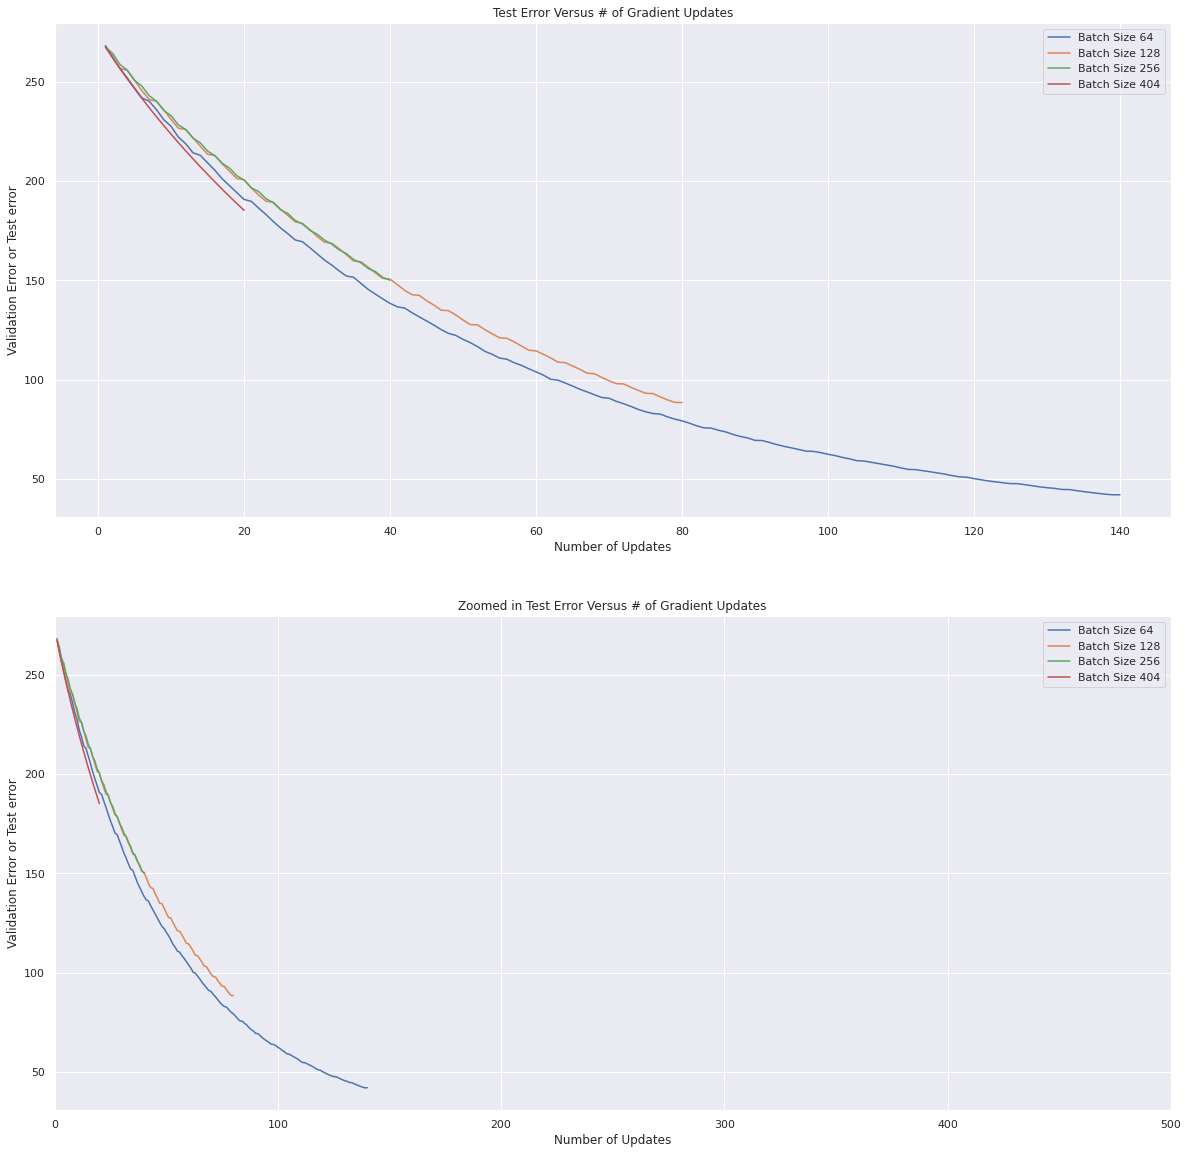

In [0]:
# Plotting test error versus gradient updates
fig, ax_lst = plt.subplots(2, 1, sharey=True, figsize=(20,20))

for count, update in enumerate(GRAD_UPDATES_test):
    ax_lst[0].plot(list(range(1, len(update)+1)), update, label = f"Batch Size {BATCH_SIZES[count]}")
    ax_lst[1].plot(list(range(1, len(update)+1)), update, label = f"Batch Size {BATCH_SIZES[count]}")

for ax in ax_lst:
  ax.set_xlabel("Number of Updates")
  ax.set_ylabel("Validation Error or Test error")
  ax.legend()

ax_lst[0].title.set_text("Test Error Versus # of Gradient Updates")
ax_lst[1].title.set_text("Zoomed in Test Error Versus # of Gradient Updates")
ax_lst[1].set_xlim([-0.01,500])
plt.show()

The following code snippet plots test error vs time for different batch sizes

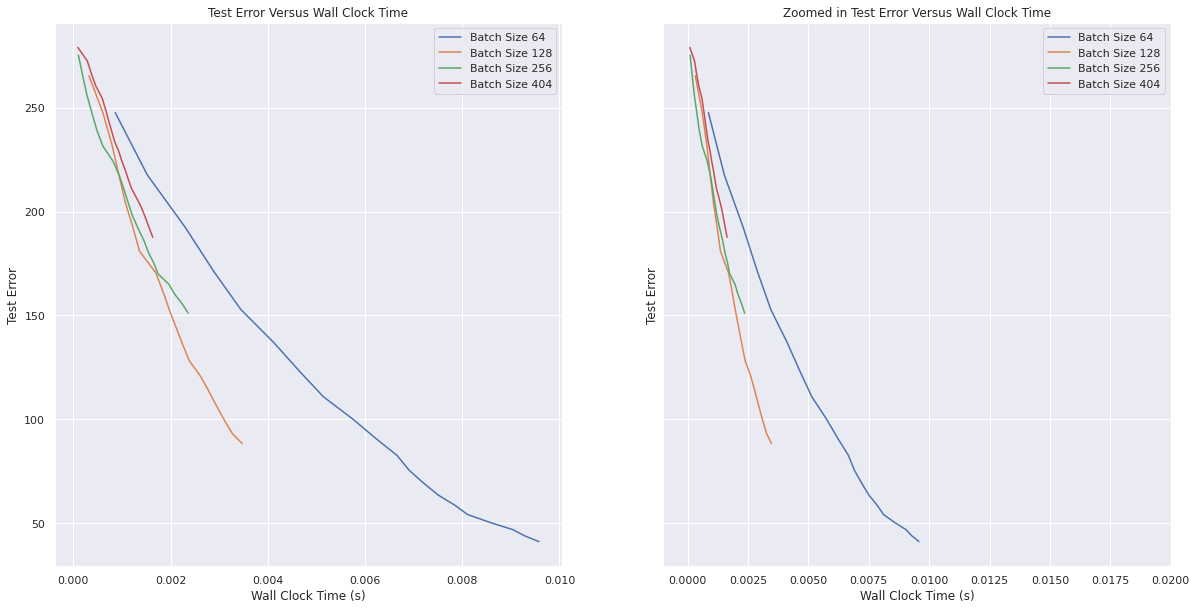

In [0]:
# Plotting test error versus time taken
fig, ax_lst = plt.subplots(1, 2, sharey=True, figsize=(20,10))

for count, wall_c in enumerate(WALL_CLOCK_test):
    t_hist = TIME_HISTORIES_test[count].cumsum()
    ax_lst[0].plot(t_hist, wall_c, label = f"Batch Size {BATCH_SIZES[count]}")
    ax_lst[1].plot(t_hist, wall_c, label = f"Batch Size {BATCH_SIZES[count]}")

for ax in ax_lst:
  ax.set_xlabel("Wall Clock Time (s)")
  ax.set_ylabel("Test Error")
  ax.legend()

ax_lst[0].title.set_text("Test Error Versus Wall Clock Time")
ax_lst[1].title.set_text("Zoomed in Test Error Versus Wall Clock Time")
ax_lst[1].set_xlim([-0.001,0.02])

plt.show()

The following code snippet plots the Test error vs Number of iterations for different batch sizes

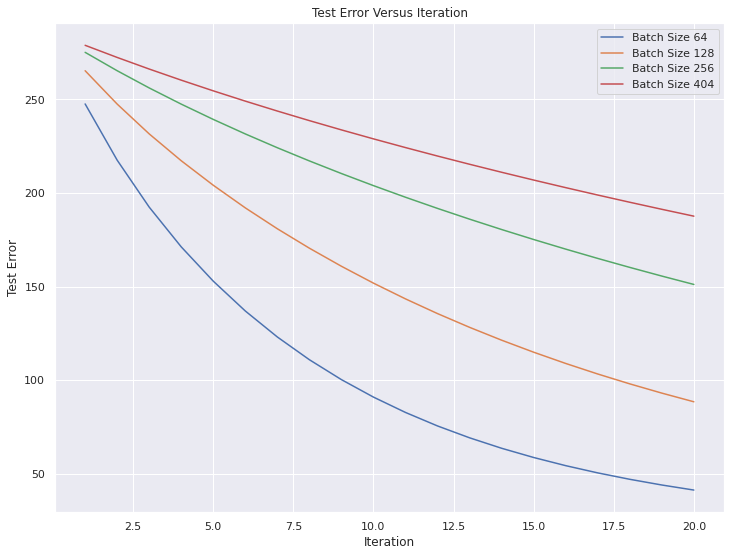

In [0]:
# Plotting test error versus iteration
for count, wall_c in enumerate(WALL_CLOCK_test):
    plt.plot(list(range(1,21)), wall_c, label = f"Batch Size {BATCH_SIZES[count]}")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Test Error")
plt.title("Test Error Versus Iteration")
plt.show()

**SWEEPING LEARNING RATE**

The following code snippet defines the function to sweep learning rate and plot test error vs number of iterations.

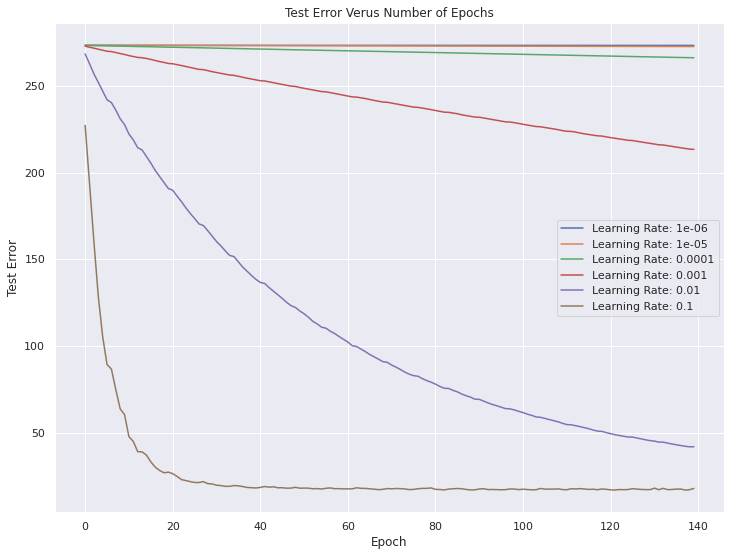

In [0]:
def batchGradientDescent_lr_test(X, y,x_t,y_t, w_t, lr, iterations, λ, bs):
    # This implementation assumes that X already has a bias column
    # m is the number of data points, n is the number of features
    m, n = X.shape

    # these are used to stored the time
    
    
    gradupdates_t = []
    
    for i in range(iterations):
        
        
        # Randomize X and Y
        indexes = np.random.permutation(m)
        X_r = X[indexes,:]
        y_r = y[indexes]
        
        # Loop through the shuffled dataset in mini batches
        for j in range(0, m, bs):
            # This code checks whether the next batch is the last batch of the 
            # r dataset
            if j+bs >= m:
                m_x = X_r[j:]
                m_y = y_r[j:]
            else:
                m_x = X_r[j:j+bs]
                m_y = y_r[j:j+bs]
            
            # Prediction of mini batch
            y_pred = np.dot(m_x,w_t)

            # Calculating residual
            residuals = y_pred - m_y

            # Calculating L2 regularized gradient
            grad = np.dot(m_x.T, residuals) + λ*w_t

            # Updating weights based on learning rate and batch size
            w_t -= (lr/bs)*grad

            # Calculating test error as MSE with 0.5 factor (NO REG. TERM)
            te_after_update_lr_test  = 0.5*np.sum((np.dot(X_val,w_t) - Y_val)**2)/X_val.shape[0]
            gradupdates_t.append(te_after_update_lr_test)

        

        
    return gradupdates_t
# Learning Rates
LEARNING_RATES = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]



GRAD_UPDATES_test = []


for lr in LEARNING_RATES:
    # Initializing random w
    np.random.seed(42)
    W = np.random.randn(18,1)
    
    gradupdates_test = batchGradientDescent_lr_test(X_train, Y_train,X_val,Y_val, w_t = W, lr=lr, iterations=20, λ=9, bs=64)
    GRAD_UPDATES_test.append(gradupdates_test)
    

# Plotting results
for count, err in enumerate(GRAD_UPDATES_test):
    plt.plot(list(range(0,140)), err, label = f"Learning Rate: {LEARNING_RATES[count]}")
    plt.xlabel("Epoch")
    plt.ylabel("Test Error")
plt.legend()
plt.title("Test Error Verus Number of Epochs")
plt.show()
    
  

#COMPARING LEARNING RATES AND BATCH SIZES FOR TEST ERROR VARIOUS PARAMETERS LIKE WALLCLOCK, NUMBER OF ITERATIONS, NO OF UPDATES

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: overflow encountered in square


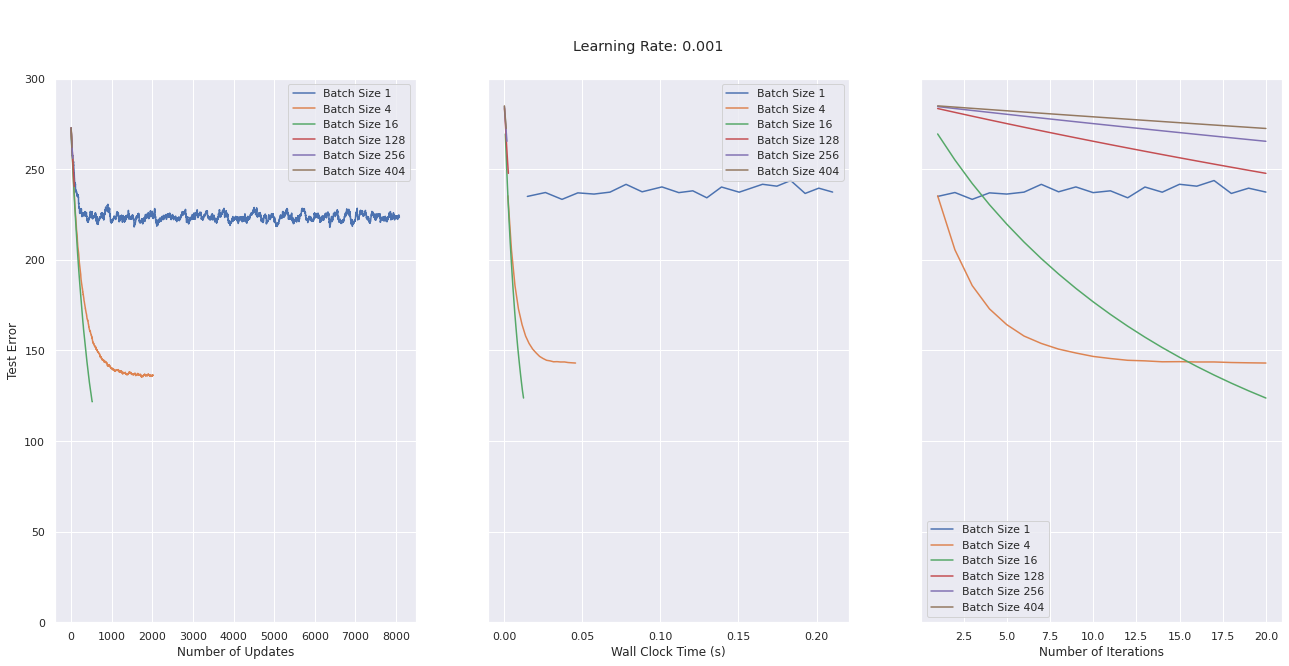

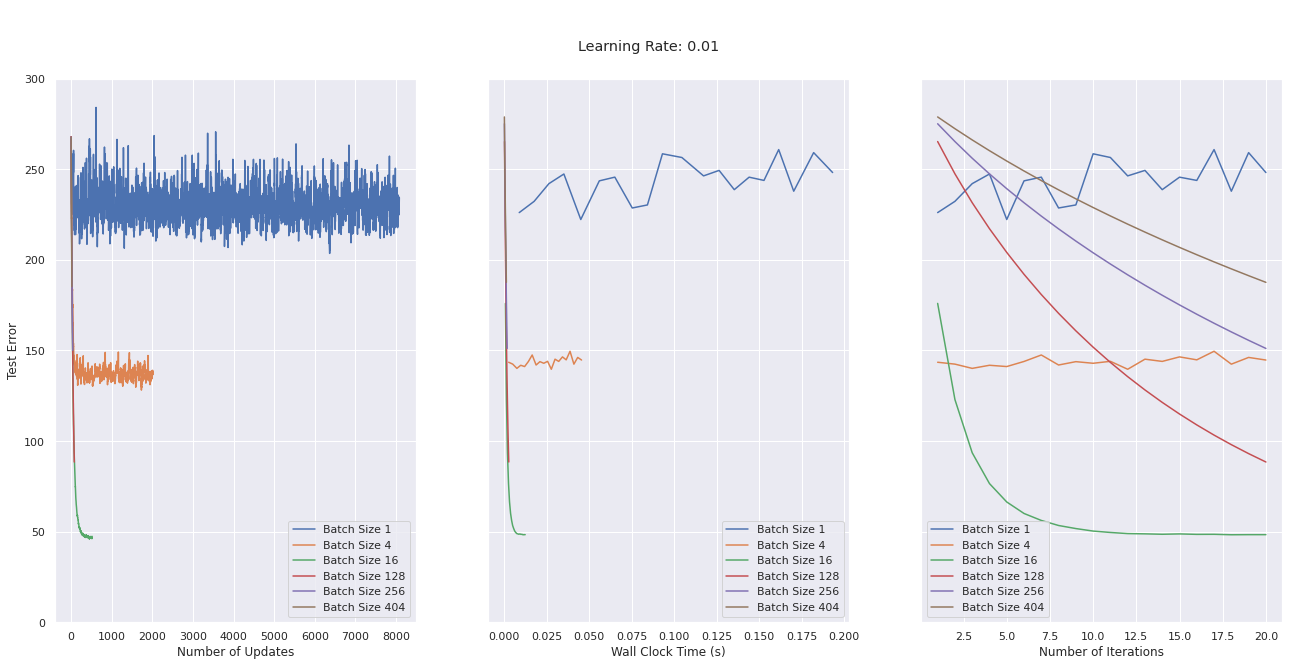

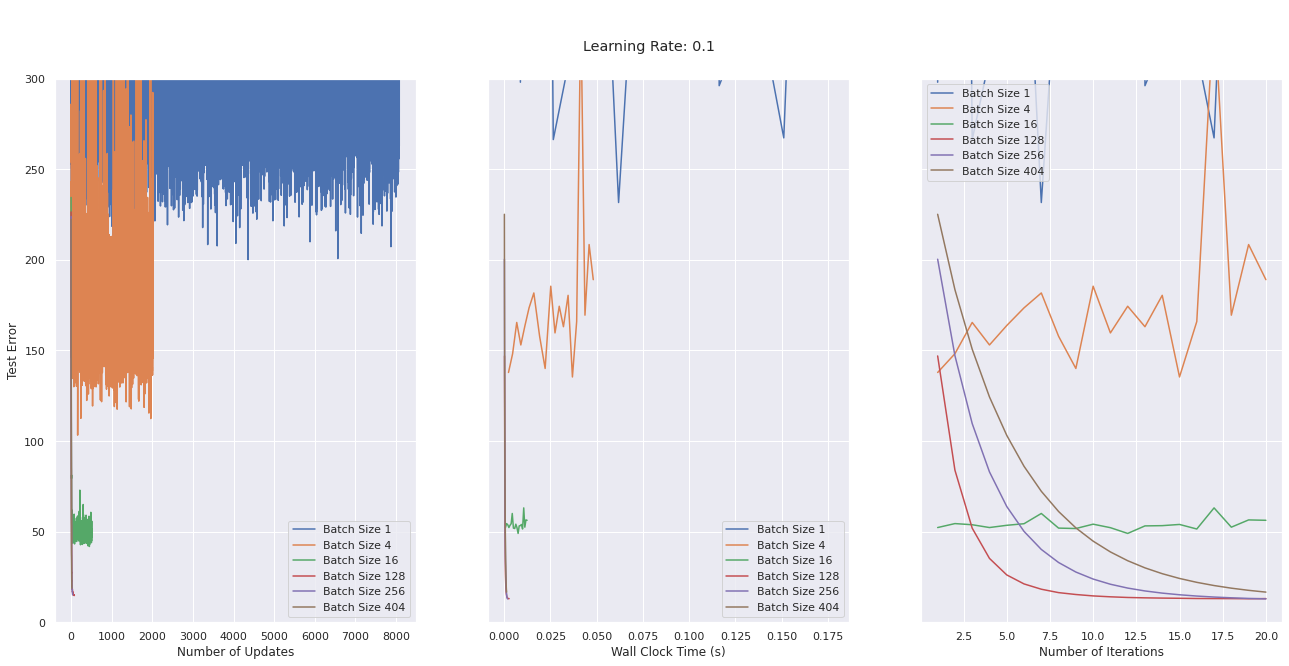

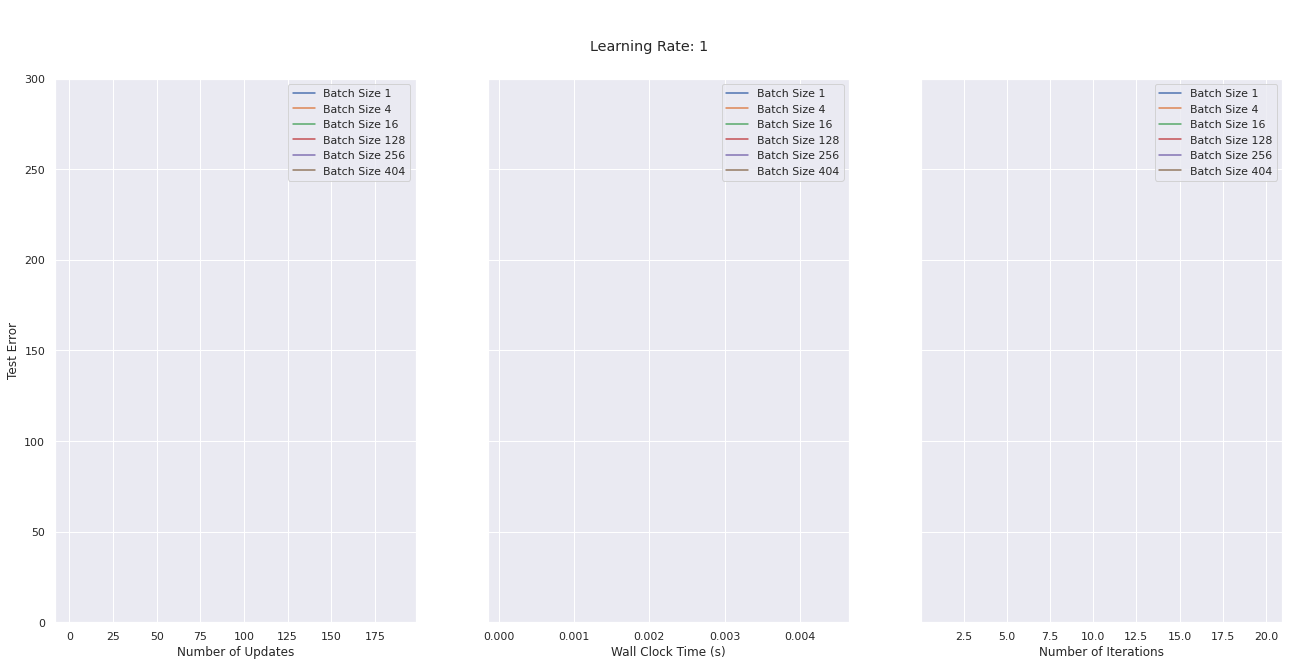

In [0]:
LEARNING_RATES = [0.001, 0.01, 0.1, 1]
BATCH_SIZES = [1, 4, 16, 128, 256, 404]

FINAL_TIME_HISTORIES_SE_test = []
FINAL_GRAD_UPDATES_SE_test = []
FINAL_WALL_CLOCK_SE_test = []

for lr in LEARNING_RATES:
  TIME_HISTORIES_SE_test = []
  GRAD_UPDATES_SE_test = []
  WALL_CLOCK_SE_test = []

  for bs in BATCH_SIZES:
    # Initializing random w
    np.random.seed(42)

    w, timeHistory_test, gradupdates_test, wallclock_test = batchGradientDescent_test(X_train, Y_train,X_val,Y_val, w = np.random.randn(18,1), lr=lr, iterations=20,λ=9, bs=bs)

    GRAD_UPDATES_SE_test.append(gradupdates_test)
    WALL_CLOCK_SE_test.append(wallclock_test)
    TIME_HISTORIES_SE_test.append(timeHistory_test)

  GRAD_UPDATES_SE_test = np.array(GRAD_UPDATES_SE_test)
  WALL_CLOCK_SE_test = np.array(WALL_CLOCK_SE_test)
  TIME_HISTORIES_SE_test = np.array(TIME_HISTORIES_SE_test)

  FINAL_TIME_HISTORIES_SE_test.append(TIME_HISTORIES_SE_test)
  FINAL_GRAD_UPDATES_SE_test.append(GRAD_UPDATES_SE_test)
  FINAL_WALL_CLOCK_SE_test.append(WALL_CLOCK_SE_test)

  # Plotting Test error versus number of gradient updates for different 
# learning rates and batch sizes
for lr_count, figure in enumerate(FINAL_GRAD_UPDATES_SE_test):
  fig, ax_lst = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (22,10))
  for bs_count, update in enumerate(figure):
      t_hist = FINAL_TIME_HISTORIES_SE_test[lr_count][bs_count].cumsum()
      ax_lst[0].plot(list(range(1, len(update)+1)), update, label = f"Batch Size {BATCH_SIZES[bs_count]}")
      ax_lst[1].plot(t_hist, FINAL_WALL_CLOCK_SE_test[lr_count][bs_count], label = f"Batch Size {BATCH_SIZES[bs_count]}")
      ax_lst[2].plot(list(range(1,21)), FINAL_WALL_CLOCK_SE_test[lr_count][bs_count], label = f"Batch Size {BATCH_SIZES[bs_count]}")

      ax_lst[0].set_xlabel("Number of Updates")
      ax_lst[1].set_xlabel("Wall Clock Time (s)")
      ax_lst[2].set_xlabel("Number of Iterations")

      for ax in ax_lst:
        ax.legend()
        ax.set_ylim([-0.01,300])
      ax_lst[0].set_ylabel("Test Error")
      fig.suptitle(f"\n\nLearning Rate: {LEARNING_RATES[lr_count]}")
plt.show()

## Question 5 - Adaptive Learning rate [2 marks]

Impelement an adaptive learning rate scheme where you start a mini-batch gradient descent with a large learning rate and decrease the learning rate while you are getting closer to the local minima. 

#Solution
The adaptive learning rate scheme is developed based on the training error values. 

**From the graph below it can be observed that there is a change in the training error vs number of iterations due to change in the learning rate.** 

Initially when the error is very high the learning rate is set to a larget value and as the error approaches to least value, the learning rate was reduced.


*   When the error lies between 201 and 300, a learning rate of 0.4 was used
*   When the error lies between 101 and 200, a learning rate of 0.08 was used
*   When the error lies between 51 and 100, a learning rate of 0.01 was used
*   When the error lies between 26 and 50, a learning rate of 0.001 was used
*   When the error lies between 0 and 25, a learning rate of 0.0001 was used



The following code snippet implements adaptive learning rate algorithm

In [0]:
import time
def batchGradientDescent_lr(X, y,x_t,y_t, w, lr_a, iterations, λ, bs):
    # This implementation assumes that X already has a bias column
    # m is the nunmber of data points, n is the number of features
    m, n = X.shape

    # these are used to stored the time
    timeHistory = np.zeros(iterations)
    wallclock = np.zeros(iterations)
    gradupdates = []
    valerror_5 = []
    
    for i in range(iterations):
        # Store the current time
        start_time = time.time()
        
        # Randomize X and Y
        indexes = np.random.permutation(m)
        X_r = X[indexes,:]
        y_r = y[indexes]
        
        # Loop through the shuffled dataset in mini batches
        for j in range(0, m, bs):
            # This code checks whether the next batch is the last batch of the 
            # r dataset
            if j+bs >= m:
                m_x = X_r[j:]
                m_y = y_r[j:]
            else:
                m_x = X_r[j:j+bs]
                m_y = y_r[j:j+bs]
            
            # Prediction of mini batch
            y_pred = np.dot(m_x,w)

            # Calculating residual
            residuals = y_pred - m_y

            # Calculating L2 regularized gradient
            grad = np.dot(m_x.T, residuals) + λ*w

            # Updating weights based on learning rate and batch size
            w -= (lr_a/bs)*grad
            # Calculating test error as MSE with 0.5 factor (NO REG. TERM)
            val_errors_l = 0.5*np.sum((np.dot(x_t,w) - y_t)**2)/x_t.shape[0]

            # Calculating training error as MSE with 0.5 factor (NO REG. TERM)
            te_after_update_lr = 0.5*np.sum((np.dot(X_r, w) - y_r)**2)/m
            gradupdates.append(te_after_update_lr)
            valerror_5.append(val_errors_l)
            #adaptive learning rate algorithm(varying learning rate based on Error) 
            if 200 < te_after_update_lr <= 300:
              lr_a = 0.4
            elif  100 < te_after_update_lr <= 200:
              lr_a = 0.08  
            elif  50 < te_after_update_lr <= 100:
              lr_a = 0.01
            elif  25 < te_after_update_lr <= 50:
              lr_a = 0.001
            elif  0 < te_after_update_lr <= 25:
              lr_a = 0.0001
           

        # Calculating time taken for iteration in microseconds   
        time_taken = time.time() - start_time
        
        # Calculating training error as MSE with 0.5 factor (NO REG. TERM)
        te_wallclock = 0.5*np.sum((np.dot(X_r, w) - y_r)**2)/m
        

        timeHistory[i] = time_taken
        wallclock[i] = te_wallclock
    val_errors_final_5 = 0.5*np.sum((np.dot(x_t,w) - y_t)**2)/x_t.shape[0]
    return w, timeHistory, gradupdates, wallclock, valerror_5, val_errors_final_5

# Batch sizes to test
BATCH_SIZES = [128]

TIME_HISTORIES = []
GRAD_UPDATES_alr = []
WALL_CLOCK_alr = []
VAL_ERROR = []

for bs in BATCH_SIZES:
    # Initializing random w
    np.random.seed(42)
    W = np.random.randn(18,1)
    
    w, timeHistory, gradupdates, wallclock,valerror_5,val_errors_final_5 = batchGradientDescent_lr(X_train, Y_train,X_val,Y_val, w = W, lr_a=0.1, iterations=400, bs=bs,λ=9)
    GRAD_UPDATES_alr.append(gradupdates)
    WALL_CLOCK_alr.append(wallclock)
    TIME_HISTORIES.append(timeHistory)
    VAL_ERROR.append(valerror_5)

The following code snippet plots training

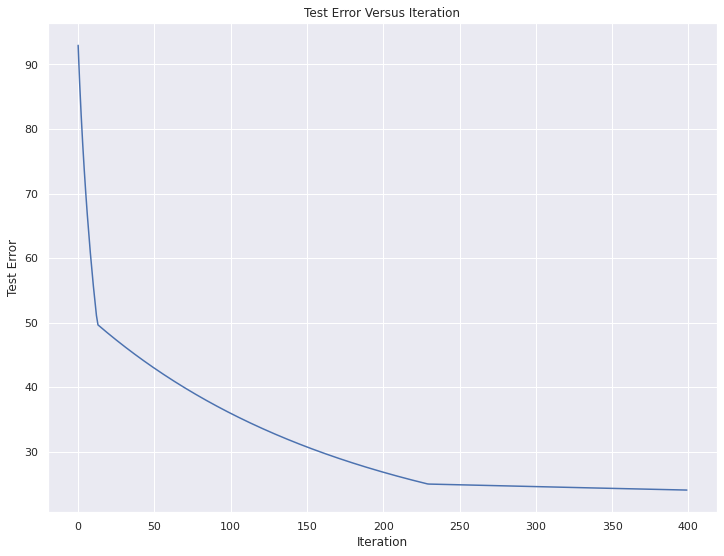

In [0]:
# Plotting training error versus iteration
for count, wall_c in enumerate(WALL_CLOCK_alr):
    plt.plot(list(range(0,400)), wall_c)
plt.xlabel("Iteration")
plt.ylabel("Test Error")
plt.title("Test Error Versus Iteration")
plt.show()

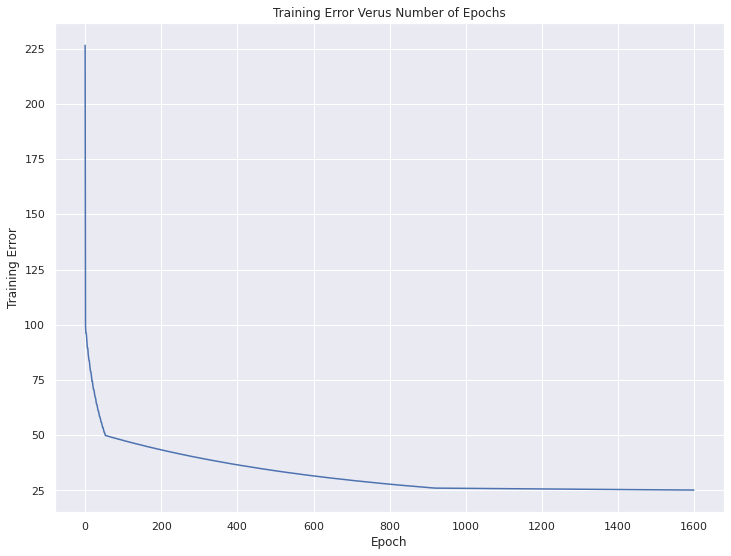

In [0]:
# Plotting results
for count, err in enumerate(VAL_ERROR):
    plt.plot(list(range(0,1600)), err)
    plt.xlabel("Epoch")
    plt.ylabel("Training Error")
plt.title("Training Error Verus Number of Epochs")
plt.show()

## Question 6 - Fastest Solution! [2 +1 Bonus marks]
Less training time, More marks!

So far, you learned alot about gradient descent. 
Now consider you are an Machine learning expert working for a huge corporation. One of the most important things you will face as an ML expert is to train and develope your models as fast & accurate as possible.

 In this part we want to find a mini-batch size and a learning rate adjustment scheme to train the model quickly. Use the Python time library to measure the training time (time you spend to find the weights). Repeat every case at least 10 times and report the average time (the machine that is running your code is also performing other tasks, averaging time will help you to have a better judgment about the performance of your model). You should train your model until the loss of the model on the test set is close to direct solution with $\pm 1\%$ error. 

 Elaborate your findings with help of tables/plots.

 Report your Best time, and Accuracy!

In [0]:
import time
def batchGradientDescent_lr(X, y,x_t,y_t, w, lr_a, iterations, λ, bs):
    # This implementation assumes that X already has a bias column
    # m is the nunmber of data points, n is the number of features
    
    m, n = X.shape

    # these are used to stored the time
    timeHistory = np.zeros(iterations)
    wallclock6 = np.zeros(iterations)
    gradupdates = []
    valerror = []
    start_time = time.time()
    for i in range(iterations):
        # Store the current time
        
        
        # Randomize X and Y
        indexes = np.random.permutation(m)
        X_r = X[indexes,:]
        y_r = y[indexes]
        
        # Loop through the shuffled dataset in mini batches
        for j in range(0, m, bs):
            # This code checks whether the next batch is the last batch of the 
            # r dataset
            if j+bs >= m:
                m_x = X_r[j:]
                m_y = y_r[j:]
            else:
                m_x = X_r[j:j+bs]
                m_y = y_r[j:j+bs]
            
            # Prediction of mini batch
            y_pred = np.dot(m_x,w)

            # Calculating residual
            residuals = y_pred - m_y

            # Calculating L2 regularized gradient
            grad = np.dot(m_x.T, residuals) + λ*w

            # Updating weights based on learning rate and batch size
            w -= (lr_a/bs)*grad
            val_errors_l = 0.5*np.sum((np.dot(x_t,w) - y_t)**2)/x_t.shape[0]

            # Calculating training error as MSE with 0.5 factor (NO REG. TERM)
            te_after_update_lr = 0.5*np.sum((np.dot(X_r, w) - y_r)**2)/m

            time_taken6 = time.time() - start_time
            gradupdates.append(te_after_update_lr)
            valerror.append(val_errors_l)

            
           

        # Calculating time taken for iteration in microseconds   
       
        
        # Calculating training error as MSE with 0.5 factor (NO REG. TERM)
        te_wallclock6 = 0.5*np.sum((np.dot(X_r, w) - y_r)**2)/m
        time_taken=time.time() - start_time
        timeHistory[i] = time_taken

        
        wallclock6[i] = te_wallclock6
    val_errors_final_6 = 0.5*np.sum((np.dot(x_t,w) - y_t)**2)/x_t.shape[0]
    
    
    
    print("Time=",time_taken6)
    return w, timeHistory, gradupdates, wallclock6, valerror, val_errors_final_6,time_taken6   

# Batch sizes to test
BATCH_SIZES = [256]

TIME_HISTORIES_f = []
GRAD_UPDATES_alr = []
WALL_CLOCK6 = []
VAL_ERROR_6 = []

for bs in BATCH_SIZES:
  
    # Initializing random w
    np.random.seed(42)
    W = np.random.randn(18,1)
    start_time_final = time.time()
    
    w, timeHistory, gradupdates, wallclock6,valerror,val_errors_final_6,time_taken6 = batchGradientDescent_lr(X_train, Y_train,X_val,Y_val, w = W, lr_a=0.1, iterations=300, bs=bs,λ=9)
    GRAD_UPDATES_alr.append(gradupdates)
    WALL_CLOCK6.append(wallclock6)
    TIME_HISTORIES_f.append(timeHistory)
    VAL_ERROR_6.append(valerror)

print(VAL_ERROR_6)
print(val_errors_final_6)
print("time=",time_taken6)

Time= 0.05047154426574707
[[223.93278104012694, 198.54617722659486, 163.32687505283616, 146.65598094954782, 120.85936698218238, 109.95110743073623, 91.24696988125595, 83.55810380793605, 70.24446041319443, 64.49326006184215, 54.5966594967573, 51.17894241470324, 44.9581189462943, 41.21700214030062, 36.41426556775568, 34.32949116162903, 30.989924097014406, 29.17162911590491, 26.656465242792624, 25.498340677542778, 23.54704026469937, 22.78863787204172, 21.386968302578314, 20.750171613854654, 19.73730797662214, 19.24434226572876, 18.439499904685885, 18.1171747779887, 17.532449659573977, 17.263349852327973, 16.847233909688114, 16.61389110824849, 16.296901007889183, 16.11331075662528, 15.875626894881457, 15.707356302744309, 15.471893374446305, 15.4049569637769, 15.388803921186884, 15.140125532454954, 15.033104870141482, 14.946884383147975, 14.81913478072989, 14.79562708658922, 14.661650376930174, 14.686298371580762, 14.62010553000628, 14.553600756669573, 14.581461690980486, 14.436773765094664

In [0]:
print("time=",time_taken6)

time= 0.05047154426574707


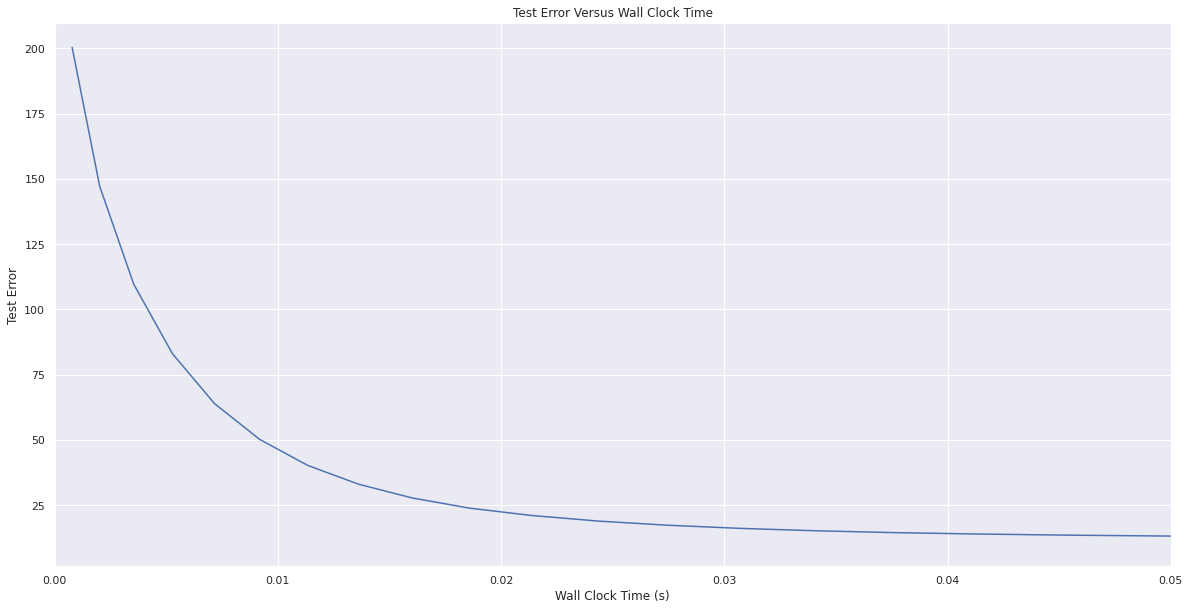

In [0]:
# Plotting test error versus time taken
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(20,10))

for count, wall_c in enumerate(WALL_CLOCK6):
    t_hist = TIME_HISTORIES_f[count].cumsum()
    ax.plot(t_hist, wall_c, label = f"Batch Size {BATCH_SIZES[count]}")
    ax.set_xlabel("Wall Clock Time (s)")
    ax.set_ylabel("Test Error")

    ax.title.set_text("Test Error Versus Wall Clock Time")
    ax.set_xlim(0,0.05)
plt.show()

The following code calculates the percentage difference between the obtained solution and direct solution

In [0]:
print("Percentage error=",((val_error_original-val_errors_final_6)/val_error_original)*100,"%")

Percentage error= -1.2835467973329624 %


##The best time is 0.035 Seconds when averaged for 10 values
##The percentage error is 1.2%

## References

https://datascience.stackexchange.com/questions/10188/why-do-cost-functions-use-the-square-error

Linear Regression:
1. https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html

Gradient Descent (images and equations):
1. https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
2. https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

Modified: Saket Thavanani